<a href="https://colab.research.google.com/github/VADLAPUDIOMPRAKASH/Electric-Vehicle-Market-segementation-Analaysis/blob/main/Behavioural_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [27]:
data = pd.read_csv('/content/behavioural_dataset.csv')

In [28]:
data = pd.get_dummies(data, columns=['Profession', 'Marrital Status', 'Education', 'Car loan'])

In [29]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'No of Dependents', 'Total Salary', 'EV Price']])

# Combine scaled numerical and categorical data
processed_data = np.concatenate([scaled_data, data.drop(['Age', 'No of Dependents', 'Total Salary', 'EV Price'], axis=1)], axis=1)

<Figure size 1200x800 with 0 Axes>

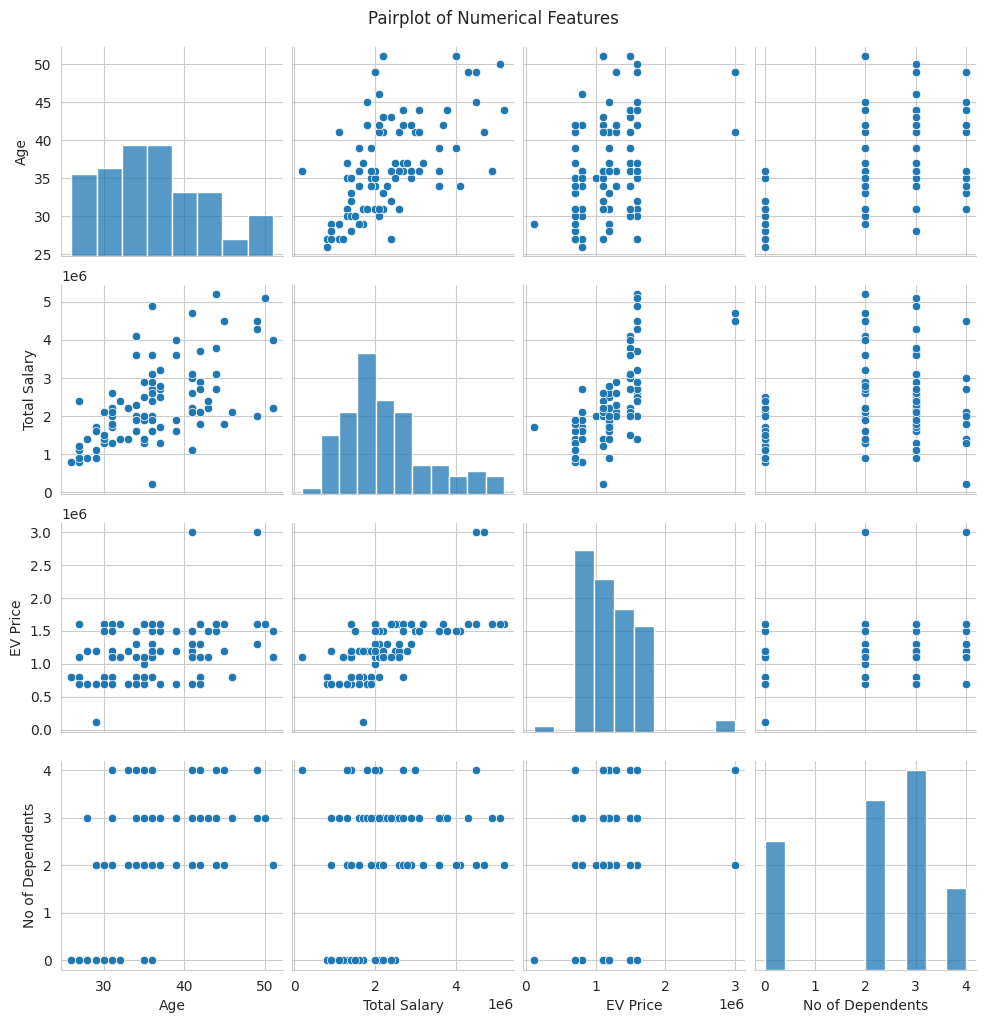

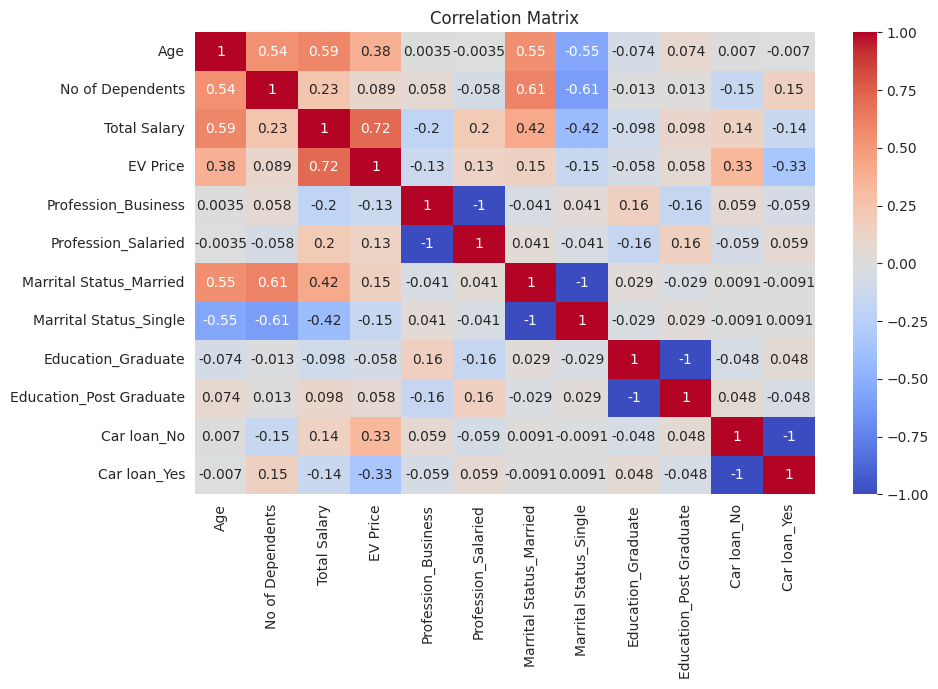

In [30]:
plt.figure(figsize=(12,8))
sns.pairplot(data[['Age', 'Total Salary', 'EV Price', 'No of Dependents']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

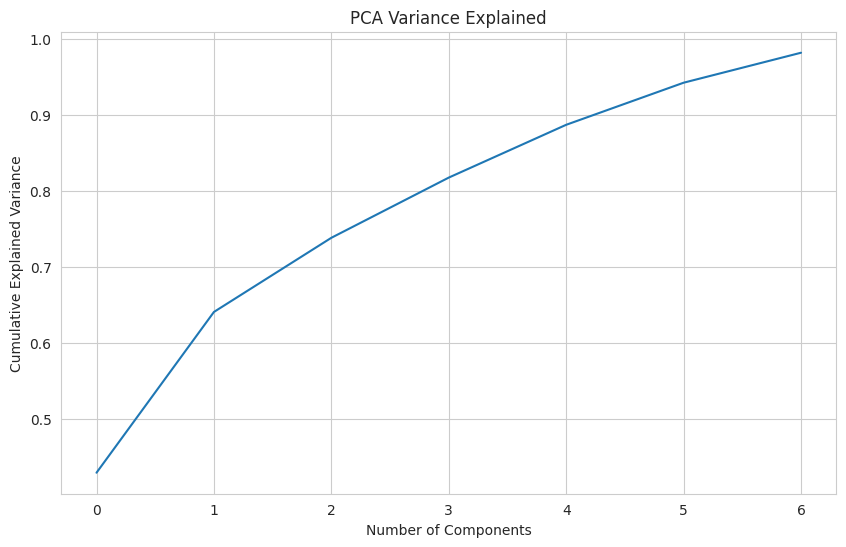

In [31]:
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(processed_data)

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Explained')
plt.show()

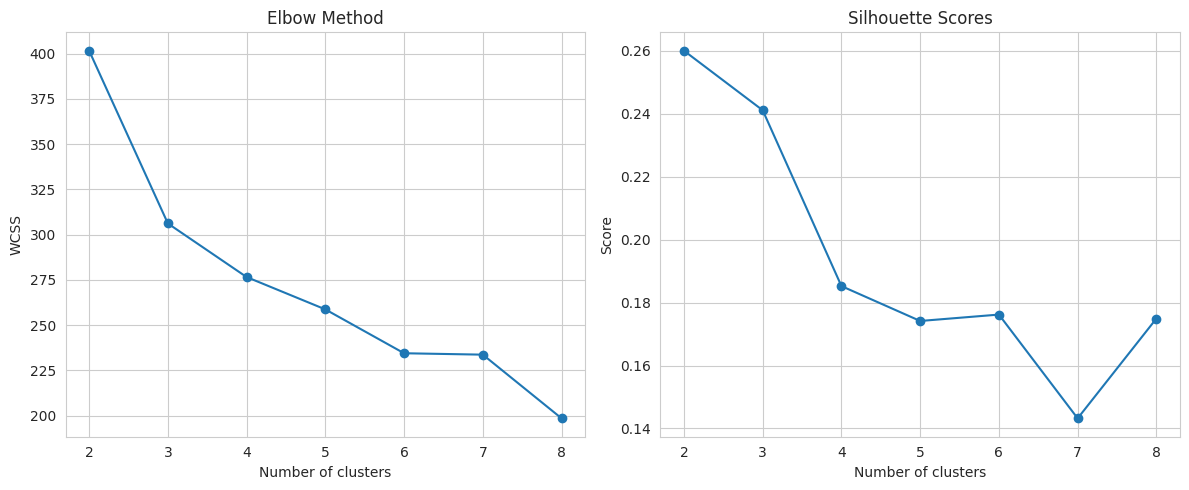

In [32]:
wcss = []
silhouette_scores = []
max_clusters = 8

for k in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(principal_components)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(principal_components, labels))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(2,max_clusters+1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1,2,2)
plt.plot(range(2,max_clusters+1), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

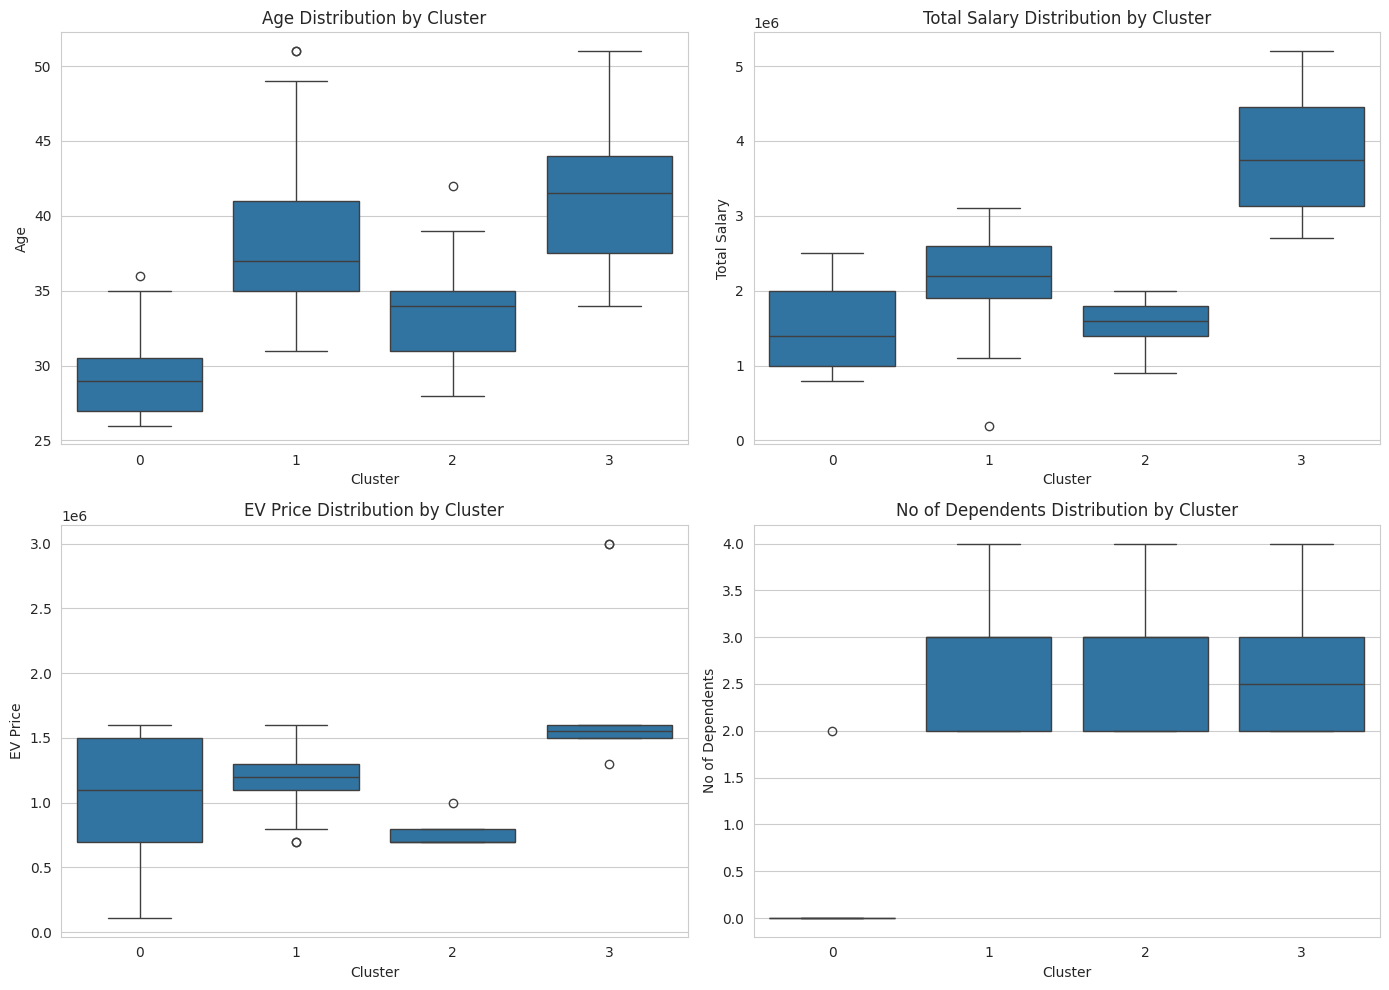

In [33]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(principal_components)

# Cluster Profiling
cluster_profile = data.groupby('Cluster').agg({
    'Age': 'mean',
    'Total Salary': 'mean',
    'EV Price': 'mean',
    'No of Dependents': 'mean',
    'Car loan_Yes': 'mean',
    'Profession_Business': 'mean',
    'Marrital Status_Married': 'mean'
}).reset_index()

# Visualization
plt.figure(figsize=(14,10))
for i, column in enumerate(['Age', 'Total Salary', 'EV Price', 'No of Dependents']):
    plt.subplot(2,2,i+1)
    sns.boxplot(x='Cluster', y=column, data=data)
    plt.title(f'{column} Distribution by Cluster')
plt.tight_layout()
plt.show()

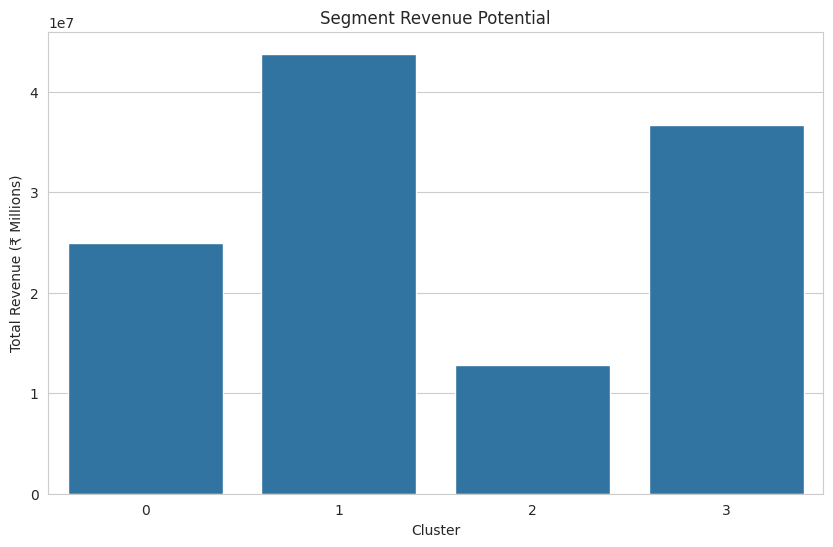

In [34]:
segment_value = data.groupby('Cluster').agg(
    Total_Customers=('Cluster', 'count'),
    Avg_EV_Price=('EV Price', 'mean'),
    Potential_Revenue=('EV Price', 'sum')
).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Cluster', y='Potential_Revenue', data=segment_value, estimator=sum)
plt.title('Segment Revenue Potential')
plt.ylabel('Total Revenue (₹ Millions)')
plt.show()

In [35]:
data.head()

,Age,No of Dependents,Total Salary,EV Price,Profession_Business,Profession_Salaried,Marrital Status_Married,Marrital Status_Single,Education_Graduate,Education_Post Graduate,Car loan_No,Car loan_Yes,Cluster
0,27,0,800000,800000,False,True,False,True,False,True,False,True,0
1,35,2,2000000,1000000,False,True,True,False,False,True,False,True,2
2,45,4,1800000,1200000,True,False,True,False,True,False,False,True,1
3,41,3,2200000,1200000,True,False,True,False,False,True,True,False,1
4,31,2,2600000,1600000,False,True,True,False,False,True,False,True,1


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

centroids = data.groupby('Cluster').agg({
    'Total Salary': 'mean',
    'EV Price': 'mean'
}).reset_index()

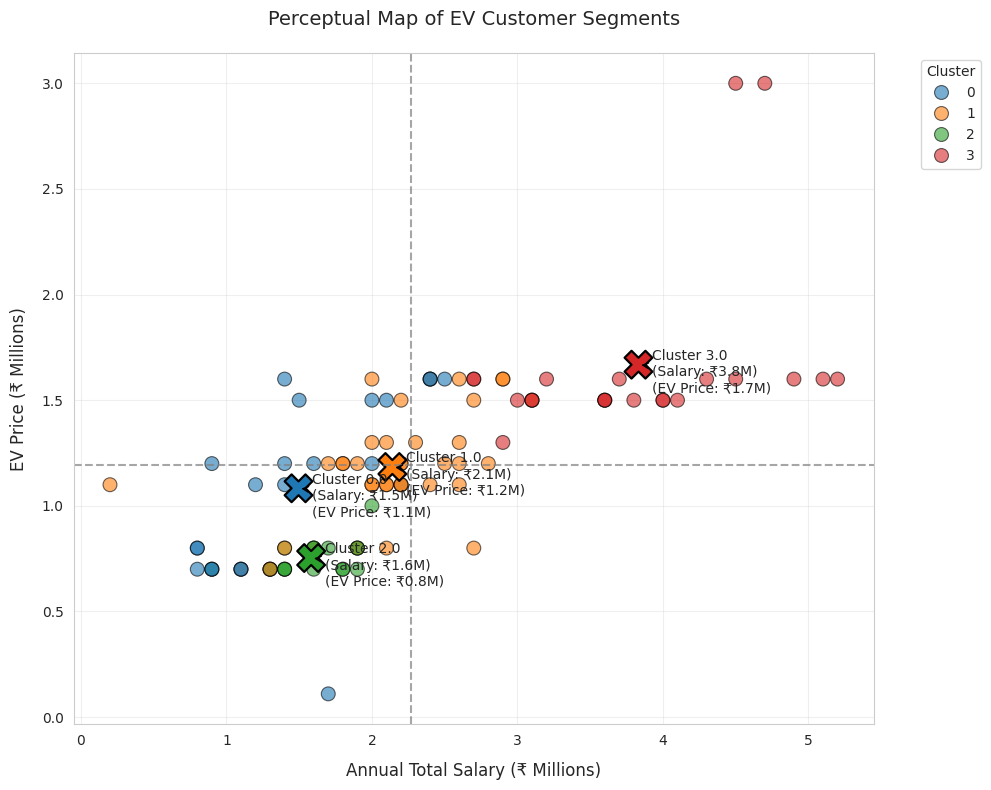

In [37]:
# 1. Calculate cluster centroids for key dimensions
centroids = data.groupby('Cluster').agg({
    'Total Salary': 'mean',
    'EV Price': 'mean'
}).reset_index()

# 2. Convert units for readability
data['Total Salary (₹M)'] = data['Total Salary'] / 1e6
data['EV Price (₹M)'] = data['EV Price'] / 1e6
centroids['Total Salary (₹M)'] = centroids['Total Salary'] / 1e6
centroids['EV Price (₹M)'] = centroids['EV Price'] / 1e6

# 3. Create perceptual map
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Scatter plot of customers
scatter = sns.scatterplot(
    x='Total Salary (₹M)',
    y='EV Price (₹M)',
    hue='Cluster',
    data=data,
    palette='tab10',
    alpha=0.6,
    s=100,
    edgecolor='black'
)

# Plot centroids with annotations
centroid_plot = sns.scatterplot(
    x='Total Salary (₹M)',
    y='EV Price (₹M)',
    data=centroids,
    hue='Cluster',
    palette='tab10',
    s=400,
    marker='X',
    edgecolor='black',
    legend=False
)

# Annotate centroids
for idx, row in centroids.iterrows():
    plt.annotate(
        f"Cluster {row['Cluster']}\n(Salary: ₹{row['Total Salary (₹M)']:.1f}M)\n(EV Price: ₹{row['EV Price (₹M)']:.1f}M)",
        (row['Total Salary (₹M)'], row['EV Price (₹M)']),
        xytext=(10, -20),
        textcoords='offset points',
        fontsize=10,
        arrowprops=dict(arrowstyle="->", color='black', lw=1)
    )

# Axis labels and title
plt.xlabel("Annual Total Salary (₹ Millions)", fontsize=12, labelpad=10)
plt.ylabel("EV Price (₹ Millions)", fontsize=12, labelpad=10)
plt.title("Perceptual Map of EV Customer Segments", fontsize=14, pad=20)

# Add quadrant lines (mean-based)
plt.axvline(data['Total Salary (₹M)'].mean(), color='gray', linestyle='--', alpha=0.7)
plt.axhline(data['EV Price (₹M)'].mean(), color='gray', linestyle='--', alpha=0.7)

# Legend and grid
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#Conclusion
The analysis of customer segments based on clustering has provided valuable insights into the behavior and purchasing power of different groups. The segmentation indicates that there are four distinct customer clusters with varying demographics, income levels, and EV purchasing tendencies. These clusters have been analyzed based on factors such as age, total salary, EV price preference, and number of dependents. The revenue potential for each segment has also been evaluated to identify the most profitable customer base. Based on the results, Cluster 3 emerges as the most financially capable group, showing a higher salary and preference for premium EV models. Conversely, Cluster 2 represents a lower-income segment with limited purchasing power. Understanding these segments allows for targeted marketing strategies to enhance EV sales and customer engagement.
